In [66]:
from PIL import Image
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pytesseract
from pytesseract import Output
import cv2
import re
import csv
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet 
import argparse
import os
import pandas as pd
import seaborn as sns

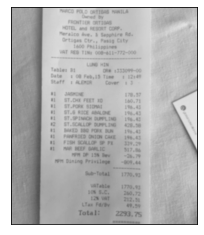

In [67]:
#question one
#lets read an image
img = cv2.imread('bill.jpg',0)
# Simple thresholding
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [68]:
#text detection with output
img = cv2.imread('bill.jpg')
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'# your path may be different
d = pytesseract.image_to_data(img, output_type=Output.DICT)
n_boxes = len(d['level'])
for i in range(n_boxes):
    (text,x,y,w,h) = (d['text'][i],d['left'][i],d['top'][i],d['width'][i],d['height'][i])
    cv2.rectangle(img, (x,y), (x+w,y+h) , (0,255,0), 2)
cv2.imshow('img',img)
cv2.waitKey(0)

-1

In [87]:
#convert it into text
img=cv2.imread('bill.jpg',0)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'# your path may be different
extracted_text = pytesseract.image_to_string(img, lang = 'eng')
print(extracted_text)

 

MARCO PDLD DRTIBAS MANILA
Dwned by
FRONTIER DRTIBAS
HDTEL and RESORT CORP-
Meralcn Ave. 8: Sapphire Rd.
Drtigas Ctr.. Pasig City
1:300 Philippines
VAT HEB TIN- DOB~611-772—000
LUNG HIN
Table: B1 DR“ 533079—00
Date : OS Feb,15 Time : 12:49
Staff : ALEMIR Cover : 3

 

X1 JASMINE 1.73.57
11 ST.CHX FEET XD 160.71
X1 ST.PDRK SIOHAI 196.43

*1 5T.G RICE ABALGNE 196.43
*1 ST.SP‘INACH DUMPLING ' 19.5.43
#2 ST.SEALLOP DUMPLINE 428.58
*1 BAKED BBQ PORK BUN 196.43
t1 PANFRIED UNION CAKE 196.43
XI FISH SCALLUP SP PXA/ 35?.2‘9
‘ 517.31:
436.79

   
   

 



In [88]:
receipt_ocr = {}

In [124]:
splits = extracted_text.splitlines()
restaurant_name = splits[2] + '' + splits[1]
print(restaurant_name)

MARCO PDLD DRTIBAS MANILA


In [107]:
# get lines with price
lines_price = []
for line in splits:
  if re.search(r'X1',line):
    lines_price.append(line)

print(lines_price)

['X1 JASMINE 1.73.57', 'X1 ST.PDRK SIOHAI 196.43']


In [119]:
# get items, total, ignore Incl
items = []
for line in lines_price:
  print(line)
  if re.search(r'Incl',line):
    continue
  if re.search(r'Total', line):
    total = line
  else:
    items.append(line)



X1 JASMINE 1.73.57
X1 ST.PDRK SIOHAI 196.43


In [122]:
# Get Name, quantity and cost 
all_items = {}
for item in items:
  details = item.split()
  quantity_name = details[0]
  quantity = quantity_name.split('x')[0]
  name = details[1]
  cost = details[2]
  all_items[name] = {'quantity':quantity, 'cost':cost}
total = splits[28] + '' + splits[1]



In [131]:
# Store the results in the dict
receipt_ocr['Consumed items'] = all_items
receipt_ocr['total'] = total

In [132]:
# Show the results in the json file
import json

receipt_json = json.dumps(receipt_ocr)
print(receipt_json)

{"items": {"JASMINE": {"quantity": "X1", "cost": "1.73.57"}, "ST.PDRK": {"quantity": "X1", "cost": "SIOHAI"}}, "total": "436.79", "Consumed items": {"JASMINE": {"quantity": "X1", "cost": "1.73.57"}, "ST.PDRK": {"quantity": "X1", "cost": "SIOHAI"}}}
